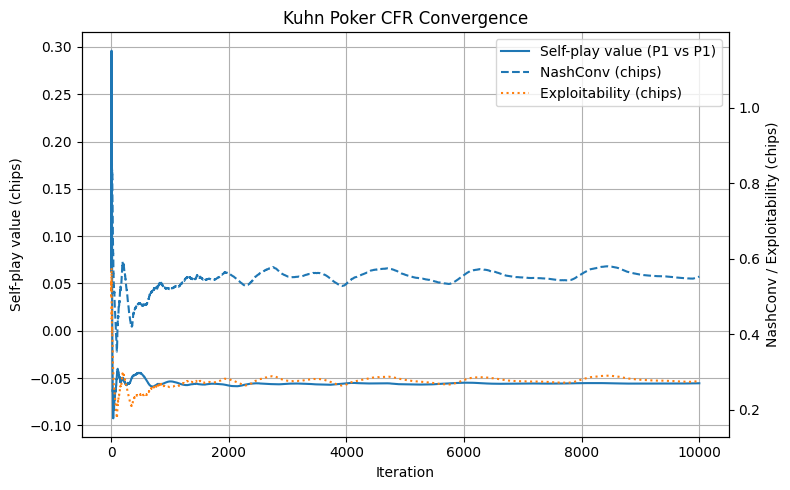

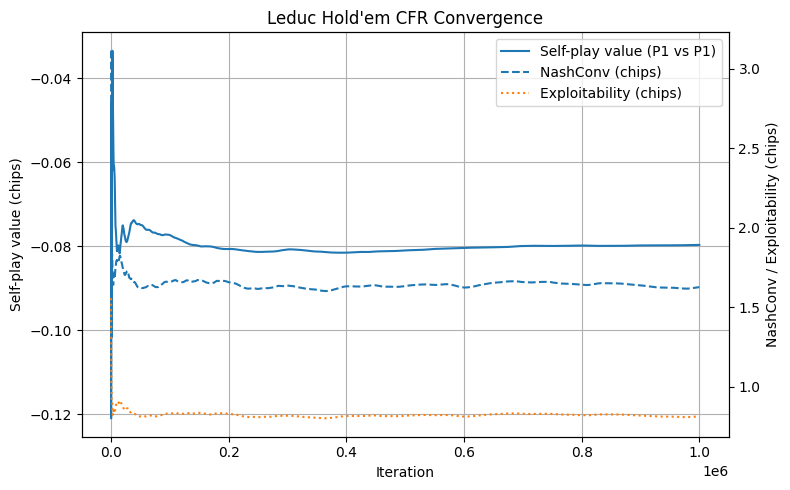

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

KUHN_LOG = Path("../output/kuhn_cfr_log.csv")
LEDUC_LOG = Path("../output/leduc_cfr_log.csv")


def load_log(path: Path) -> pd.DataFrame:
    df = pd.read_csv(
        path, names=["iteration", "policy_value", "nash_conv"],
    )

    df["exploitability"] = 0.5 * df["nash_conv"]
    return df


def plot_game(df: pd.DataFrame, title: str):
    fig, ax1 = plt.subplots(figsize=(8, 5))

    ax1.plot(df["iteration"], df["policy_value"], label="Self-play value (P1 vs P1)")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Self-play value (chips)")
    ax1.grid(True)

    ax2 = ax1.twinx()
    ax2.plot(df["iteration"], df["nash_conv"], linestyle="--", label="NashConv (chips)")
    ax2.plot(df["iteration"], df["exploitability"], linestyle=":", label="Exploitability (chips)")
    ax2.set_ylabel("NashConv / Exploitability (chips)")

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc="upper right")

    plt.title(title)
    plt.tight_layout()
    plt.show()


kuhn_df = load_log(KUHN_LOG)
plot_game(kuhn_df, "Kuhn Poker CFR Convergence")

leduc_df = load_log(LEDUC_LOG)
plot_game(leduc_df, "Leduc Hold'em CFR Convergence")
